In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data = pd.read_csv("ELISA.csv")

In [6]:
x = data["Time"]

In [7]:
concentrations = ["80","40","20","10","5","2.5","1.25","0.63","0.31","0.16","0.078","0.039", "0"]

In [8]:
columns = ['B{}'.format(i) for i in range(1,13)]+["A11"]

In [9]:
def growthPlot(name, title, cols = [], conc = []):
    savename = f'{name}.pdf'
    fig, name = plt.subplots()
    i = 0
    for e in cols:
        name.plot(x, data[e],label=concentrations[i])
        i += 1

    name.set_title(title)
    name.set_xlabel("Tid [timer]")
    name.set_ylabel("Absorbans")
    plt.subplots_adjust(right=0.77)
    name.legend(loc=(1.04,0.1))
    plt.savefig(savename, dpi=150)
    
    plt.show()

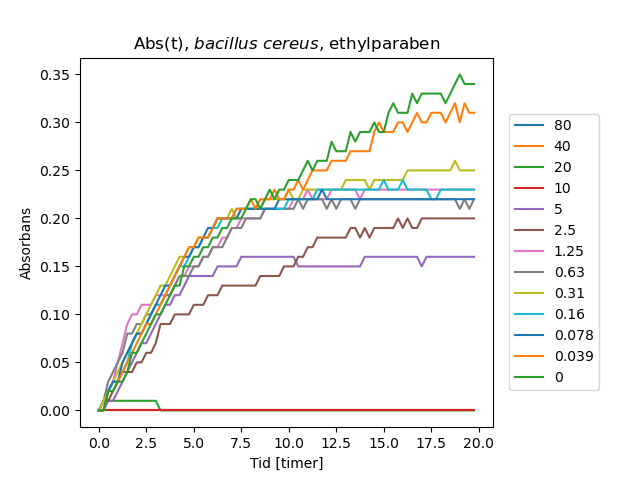

In [10]:
growthPlot('vækstbcethyl' ,"Abs(t), $\it{bacillus~cereus}$, ethylparaben", columns)

In [11]:
columns = ['C{}'.format(i) for i in range(1,13)]+["A11"]

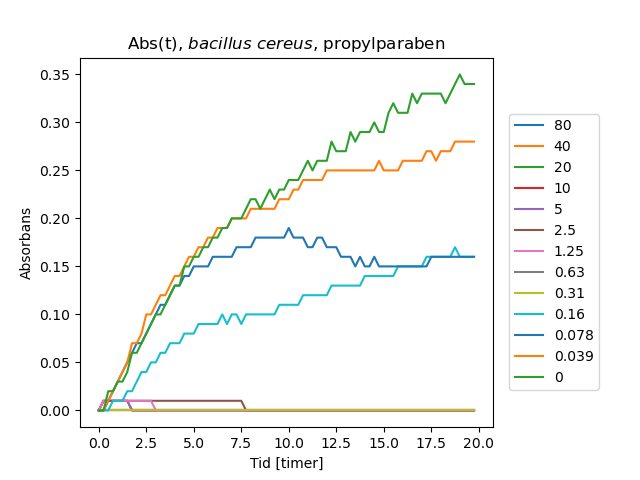

In [12]:
growthPlot('vækstbcpropyl' ,"Abs(t), $\it{bacillus~cereus}$, propylparaben", columns)

In [13]:
columns = ['F{}'.format(i) for i in range(1,13)]+["E10"]

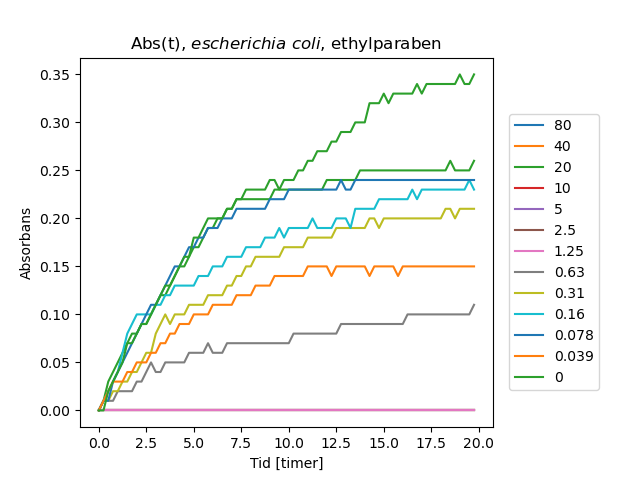

In [14]:
growthPlot('vækstecethyl' ,"Abs(t), $\it{escherichia~coli}$, ethylparaben", columns)

In [15]:
columns = ['G{}'.format(i) for i in range(1,13)]+["E10"]

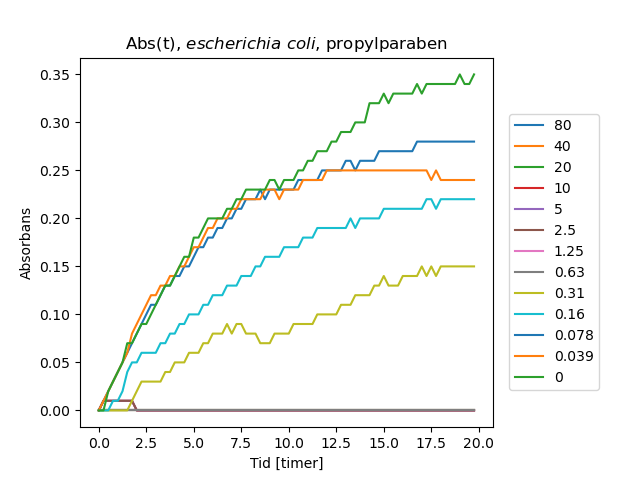

In [16]:
growthPlot('vækstecpropyl' ,"Abs(t), $\it{escherichia~coli}$, propylparaben", columns)

In [17]:
def micPlot(name, a, b, title, remove_index = []):
    nconcentrations = list(map(float, concentrations))
    savename = f'{name}.pdf'
    fig, name = plt.subplots()

    data_to_plot = data.iloc[68,a:b].values.tolist()
    if remove_index is not None:
        for e in remove_index:
            data_to_plot.pop(e)
            nconcentrations.pop(e)
        
    name.plot(nconcentrations, data_to_plot+[data.iloc[68,a-2]])

    name.set_title(title)
    name.set_xlabel("log(c)")
    name.set_ylabel("Absorbans(17t)")
    name.set_xscale("log")
    plt.savefig(savename, dpi=150)
    
    plt.show()

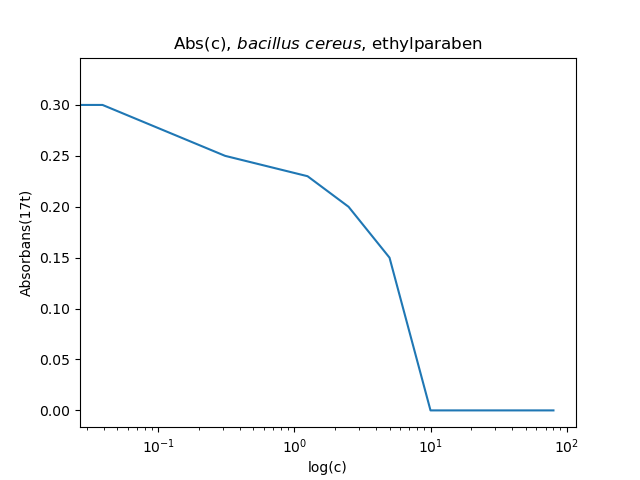

In [18]:
micPlot('micbcethyl', 13, 25, "Abs(c), $\it{bacillus~cereus}$, ethylparaben", [10,9,7])

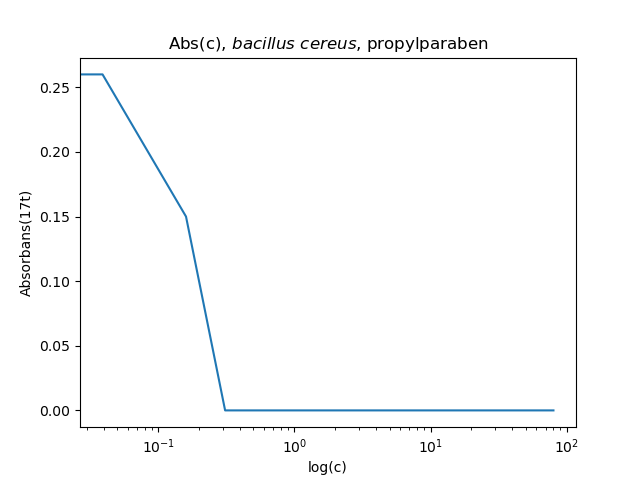

In [19]:
micPlot('micbcpropyl', 25, 37, "Abs(c), $\it{bacillus~cereus}$, propylparaben", [10])

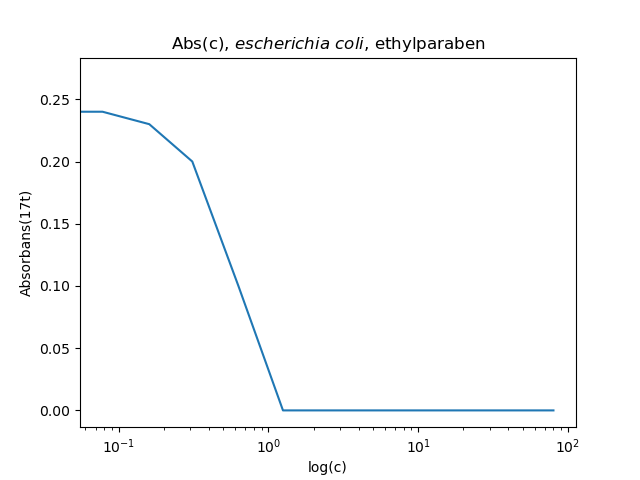

In [20]:
micPlot('micecethyl', 49, 61, "Abs(c), $\it{escherichia~coli}$, ethylparaben", [11,2])

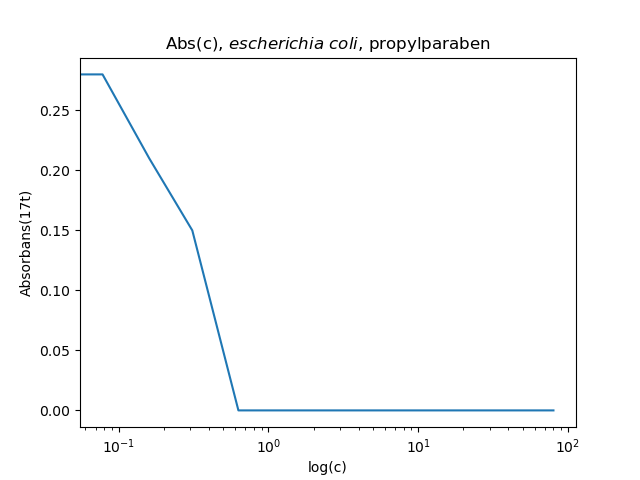

In [21]:
micPlot('micecpropyl', 61, 73, "Abs(c), $\it{escherichia~coli}$, propylparaben", [11])